In [1]:
import numpy as np
import pandas as pd
import statistics
data=pd.read_csv('C:/Users/Ukrai/Desktop/JeepWrangCSV.csv', sep='[;,]', engine='python')
df = pd.DataFrame(data)
dfn=df.drop_duplicates(subset=['VIN'])
worksheet=dfn[['Price','Auction','ProductionDate','Condition','Milage','PrimaryDamage','SecondaryDamage','Gearbox','DriveUnit','Keys']].fillna(0).reset_index()
qwe=0
for i in worksheet.Milage:
    qw = [int(w) for w in i.split() if w.isdigit()]
    if not qw:
        worksheet.at[qwe,'Milage']=float(0.0)
    else:
        worksheet.at[qwe,'Milage']=float(qw[0])
    qwe+=1
worksheet.head(3)

,index,Price,Auction,ProductionDate,Condition,Milage,PrimaryDamage,SecondaryDamage,Gearbox,DriveUnit,Keys
0,0,5600,IAAI,2008,Stationary,0,Unknown,Не указано,Manual,4X4 Drive,Present
1,1,12350,IAAI,2018,Stationary,50327,Rollover,Не указано,Automatic,4X4 Drive,Present
2,2,3750,IAAI,2008,Run and Drive,110350,Roof,Right Side,Manual,4X4 Drive,Present


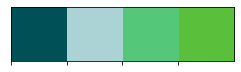

In [2]:
import seaborn as sns
colors = ['#005057','#abd3d6','#54c778','#5abf3b']
sns.palplot(sns.color_palette(colors))

In [3]:
worksheet1=worksheet[['Price','Auction','ProductionDate','Condition','PrimaryDamage','SecondaryDamage','Gearbox','DriveUnit','Keys']]
worksheet1=pd.get_dummies(worksheet1)
worksheet1['Milage']=worksheet['Milage']
worksheet=worksheet1
shaper=worksheet.shape
worksheet.shape
worksheet.head(5)

,Price,ProductionDate,Auction_ Copart,Auction_ IAAI,Condition_Engine Start Program,Condition_Enhanced Vehicles,Condition_Run And Drive,Condition_Run and Drive,Condition_Starts,Condition_Stationary,...,DriveUnit_4X4 W/Rear Wheel Drv,DriveUnit_Rear Wheel Drive,DriveUnit_Не указан,Keys_0,Keys_Exempt,Keys_Missing,Keys_No,Keys_Present,Keys_Yes,Milage
0,5600,2008,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,12350,2018,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,50327
2,3750,2008,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,110350
3,23575,2018,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,24209
4,5150,2010,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,118164


In [4]:
#we do 60/20/20 for training
import random
twontypercent=round(shaper[0]*0.2)
numbarrt=random.sample(range(1, shaper[0]),twontypercent*2)
a=0
z=0
test=[]
sample=[]
while z < twontypercent:
    worksheet.loc[numbarrt[a]]
    test.append(worksheet.loc[numbarrt[a]])
    worksheet=worksheet.drop(numbarrt[a])
    a+=1
    worksheet.loc[numbarrt[a]]
    sample.append(worksheet.loc[numbarrt[a]])
    worksheet=worksheet.drop(numbarrt[a])
    a+=1
    z+=1

train=worksheet
test = pd.DataFrame(test).reset_index()
sample=pd.DataFrame(sample).reset_index()
print(test.shape,sample.shape,train.shape)

(155, 110) (155, 110) (467, 109)


c:\users\ukrai\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ukrai\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


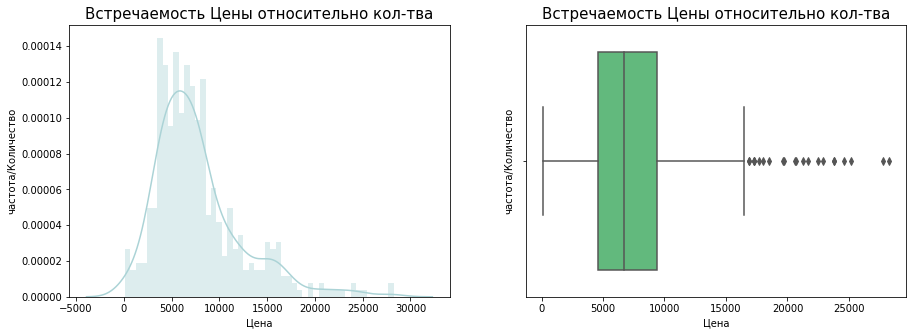

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train.Price.values, bins=50, color=colors[1])
plt.title('Встречаемость Цены относительно кол-тва',fontsize=15)
plt.xlabel('Цена'); plt.ylabel('частота/Количество');

plt.subplot(122)
sns.boxplot(train.Price.values, color=colors[2])
plt.title('Встречаемость Цены относительно кол-тва',fontsize=15)
plt.xlabel('Цена'); plt.ylabel('частота/Количество');

In [6]:
train.Price.describe()
#Целевая Переменная(ЦП) имеет стандартное распределение приблизительно от 0 до 18тыс. 
#Первый и третий квартили лежат в диапозоне приблизительно от 4800 до 9600, медиана в 8000 сек, 
#заметим также что есть выбросы начиная приблизительно от 18-19к , которые мы может удалить из обучающей выборки, ибо эти значения будут создавать шум в алгоритме.

count      467.000000
mean      7744.486081
std       4603.046476
min        125.000000
25%       4575.000000
50%       6700.000000
75%       9400.000000
max      28250.000000
Name: Price, dtype: float64

In [7]:
train.dtypes.value_counts()
#train.head()

uint8     106
int64       2
object      1
dtype: int64

In [8]:
train.dtypes[train.dtypes=='float']

Series([], dtype: object)

In [9]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

obj = train.dtypes[train.dtypes=='uint8'].index
for i in obj:
    print(i, train[i].unique())

Auction_ Copart  [0 1]
Auction_ IAAI  [1 0]
Condition_Engine Start Program [0 1]
Condition_Enhanced Vehicles [0 1]
Condition_Run And Drive [0 1]
Condition_Run and Drive [0 1]
Condition_Starts [0 1]
Condition_Stationary [1 0]
Condition_Неизвестно [0 1]
PrimaryDamage_All Over [0 1]
PrimaryDamage_Biohazard [0 1]
PrimaryDamage_Burn [0 1]
PrimaryDamage_Burn - Engine [0 1]
PrimaryDamage_Damage History [0]
PrimaryDamage_Electrical [0 1]
PrimaryDamage_Engine Burn [0 1]
PrimaryDamage_Engine Damage [0 1]
PrimaryDamage_Exterior Burn [0 1]
PrimaryDamage_Flood [0 1]
PrimaryDamage_Frame [0 1]
PrimaryDamage_Frame Damage [0 1]
PrimaryDamage_Fresh Water [0 1]
PrimaryDamage_Front End [0 1]
PrimaryDamage_Front and Rear [0 1]
PrimaryDamage_Hail [0 1]
PrimaryDamage_Interior Burn [0 1]
PrimaryDamage_Left Front [0 1]
PrimaryDamage_Left Rear [0 1]
PrimaryDamage_Left Side [0 1]
PrimaryDamage_Left and Right Side [0 1]
PrimaryDamage_Mechanical [0 1]
PrimaryDamage_Minor Dent/Scratches [0 1]
PrimaryDamage_Missing/

In [10]:
#заполняем пропущенные значения
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

In [16]:
from sklearn.preprocessing import LabelEncoder
for i in obj:
    le = LabelEncoder()
    le.fit(list(train[i].values) + list(train[i].values))
    train[i] = le.transform(list(train[i].values))
train[obj].head()

,Auction_ Copart,Auction_ IAAI,Condition_Engine Start Program,Condition_Enhanced Vehicles,Condition_Run And Drive,Condition_Run and Drive,Condition_Starts,Condition_Stationary,Condition_Неизвестно,PrimaryDamage_All Over,...,DriveUnit_4X4 Drive,DriveUnit_4X4 W/Rear Wheel Drv,DriveUnit_Rear Wheel Drive,DriveUnit_Не указан,Keys_0,Keys_Exempt,Keys_Missing,Keys_No,Keys_Present,Keys_Yes
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


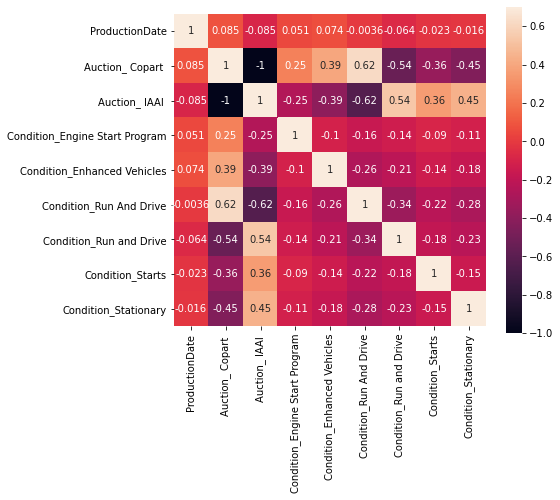

In [17]:
corr = train[train.columns[1:10]].corr()

fig,ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr, vmax=.7, square=True,annot=True);

In [19]:
threshold = 1

corr_all = train.drop(columns=obj, axis=1).corr()
corr_all.loc[:,:] =  np.tril(corr_all, k=-1)

already_in = set()
result = []
for col in corr_all:
    perfect_corr = corr_all[col][corr_all[col] == threshold ].index.tolist()
    if perfect_corr and col not in already_in:
        already_in.update(set(perfect_corr))
        perfect_corr.append(col)
        result.append(perfect_corr)
result

[]

In [ ]:
train.T.drop_duplicates().T

In [ ]:
https://www.kaggle.com/miracl16/eda-mercedes-benz-russian-version